In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Loading the test data in memory
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X1*** and ***Product Size*** = ***Small*** and ***Product Type*** = ***Liquid***

In [9]:
# Loading the training data in memory
df = pd.read_csv("/content/drive/MyDrive/Maersk/x1_small_liquid_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,Oct-20,66.15
1,Oct-20,66.15
2,Oct-20,66.15
3,Oct-20,66.15
4,Oct-20,66.15


In [10]:
# Converting the Month of Sourcing data from strinf to datetime format for training
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2020-10-25,66.15
1,2020-10-25,66.15
2,2020-10-25,66.15
3,2020-10-25,66.15
4,2020-10-25,66.15


In [11]:
# Ordering the training data by Month of Sourcing (oldest to newest)
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
2982,2020-07-25,62.99
2701,2020-07-25,61.70
2702,2020-07-25,56.56
2703,2020-07-25,62.88
2704,2020-07-25,62.98
...,...,...
4387,2021-05-25,66.61
4386,2021-05-25,67.00
4385,2021-05-25,66.58
4405,2021-05-25,66.82


(0.0, 500.0)

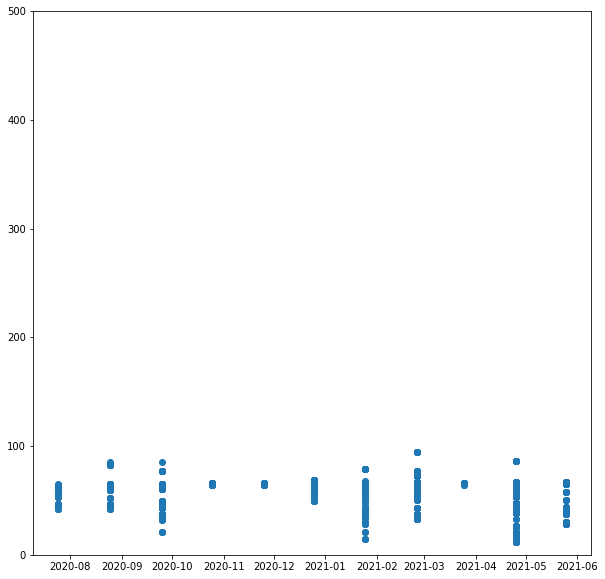

In [12]:
# Plottting the training data to visualize the scatter plot of the grouped time-series
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,500))

In [13]:
# Making prediction on the filtered data
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [14]:
# Computing the Absolute Error in model's performance
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Making prediction on the filtered data
test_df = test_df[(test_df["Manufacturer"]=="X1") & (test_df["Product Size"]=="Small") & (test_df["Product Type"]=="Liquid") ]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)

  ProductType Manufacturer Area Code  ...         ds      y       yhat
0        NTM3           X1       A35  ... 2021-06-25  42.80  52.587484
1        NTM3           X1       A44  ... 2021-06-25  89.57  52.587484

[2 rows x 9 columns]


In [18]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

  ProductType Manufacturer Area Code  ...      y       yhat Absolute Error
0        NTM3           X1       A35  ...  42.80  52.587484       9.787484
1        NTM3           X1       A44  ...  89.57  52.587484      36.982516

[2 rows x 10 columns]


In [19]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  23.384999999999998
